In [4]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
# initialize h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_282"; OpenJDK Runtime Environment (build 1.8.0_282-bre_2021_01_20_16_06-b00); OpenJDK 64-Bit Server VM (build 25.282-b00, mixed mode)
  Starting server from /Users/mathanraj/miniconda3-intel/envs/h2o-ieee/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/zj/gwq9z5vn0tz1w2vrj049st180000gn/T/tmppxjct6hk
  JVM stdout: /var/folders/zj/gwq9z5vn0tz1w2vrj049st180000gn/T/tmppxjct6hk/h2o_mathanraj_started_from_python.out
  JVM stderr: /var/folders/zj/gwq9z5vn0tz1w2vrj049st180000gn/T/tmppxjct6hk/h2o_mathanraj_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Colombo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,30 days
H2O_cluster_name:,H2O_from_python_mathanraj_w9tppf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
# load data from external sources
data = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/Training/CreditCard.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
data.head()

ID,CreditLimit,Sex,Education,Marriage,Age,Status1,Status2,Status3,Status4,Status5,Status6,BillAmt1,BillAmt2,BillAmt3,BillAmt4,BillAmt5,BillAmt6,PayAmt1,PayAmt2,PayAmt3,PayAmt4,PayAmt5,PayAmt6,Default
1,20000,F,2,M,24,1,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,F,2,S,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,F,2,S,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,F,2,M,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,M,2,M,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,M,1,S,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,M,1,S,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,F,2,S,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,F,3,M,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,M,3,S,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
data.columns

['ID',
 'CreditLimit',
 'Sex',
 'Education',
 'Marriage',
 'Age',
 'Status1',
 'Status2',
 'Status3',
 'Status4',
 'Status5',
 'Status6',
 'BillAmt1',
 'BillAmt2',
 'BillAmt3',
 'BillAmt4',
 'BillAmt5',
 'BillAmt6',
 'PayAmt1',
 'PayAmt2',
 'PayAmt3',
 'PayAmt4',
 'PayAmt5',
 'PayAmt6',
 'Default']

In [7]:
# check shape of data
data.shape

(29999, 25)

In [8]:
# drop id column & set target variable as a catogarical variable
data = data.drop(["ID"])
data["Default"] = data["Default"].asfactor()

In [9]:
# split data into train, test & valid
train, test, valid = data.split_frame([.7,.2])

In [10]:
# get feature names
x = data.columns.remove("Default")

In [11]:
help(H2OAutoML)

Help on class H2OAutoML in module h2o.automl._estimator:

class H2OAutoML(h2o.automl._base.H2OAutoMLBaseMixin, h2o.base.Keyed)
 |  H2OAutoML(nfolds=-1, balance_classes=False, class_sampling_factors=None, max_after_balance_size=5.0, max_runtime_secs=None, max_runtime_secs_per_model=None, max_models=None, distribution='AUTO', stopping_metric='AUTO', stopping_tolerance=None, stopping_rounds=3, seed=None, project_name=None, exclude_algos=None, include_algos=None, exploitation_ratio=-1, modeling_plan=None, preprocessing=None, monotone_constraints=None, keep_cross_validation_predictions=False, keep_cross_validation_models=False, keep_cross_validation_fold_assignment=False, sort_metric='AUTO', export_checkpoints_dir=None, verbosity='warn', **kwargs)
 |  
 |  Automatic Machine Learning
 |  
 |  The Automatic Machine Learning (AutoML) function automates the supervised machine learning model training process.
 |  It trains several models, cross-validated by default, by using the following availa

In [12]:
# create & train the model
aml = H2OAutoML(
    nfolds=5,
    max_models=5,
    max_runtime_secs=60, 
    seed=1234
)
aml.train(x=x ,y="Default", training_frame=train, validation_frame=valid)

AutoML progress: |
01:00:54.575: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220903_10054

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1051961171812481
RMSE: 0.3243395091277782
LogLoss: 0.34258610229192643
Null degrees of freedom: 10035
Residual degrees of freedom: 10030
Null deviance: 10620.077627443934
Residual deviance: 6876.388245203547
AIC: 6888.388245203547
AUC: 0.9088448298927326
AUCPR: 0.7591315234344757
Gini: 0.8176896597854653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2098641980590234: 


,0,1,Error,Rate
0,6346.0,1465.0,0.1876,(1465.0/7811.0)
1,332.0,1893.0,0.1492,(332.0/2225.0)
Total,6678.0,3358.0,0.1791,(1797.0/10036.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2098642,0.6781300,246.0
max f2,0.1781315,0.7896370,265.0
max f0point5,0.5577866,0.7059096,97.0
max accuracy,0.5513070,0.8547230,99.0
max precision,0.8529887,1.0,0.0
max recall,0.0724893,1.0,355.0
max specificity,0.8529887,1.0,0.0
max absolute_mcc,0.2098642,0.5838742,246.0
max min_per_class_accuracy,0.2189066,0.8239662,240.0
max mean_per_class_accuracy,0.1927355,0.8349666,256.0



Gains/Lift Table: Avg response rate: 22.17 %, avg score: 22.09 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100638,0.7911792,4.5105618,4.5105618,1.0,0.8172008,1.0,0.8172008,0.0453933,0.0453933,351.0561798,351.0561798,0.0453933
2,0.0200279,0.7625597,4.5105618,4.5105618,1.0,0.7763561,1.0,0.7968801,0.0449438,0.0903371,351.0561798,351.0561798,0.0903371
3,0.0300917,0.7377652,4.3765847,4.4657549,0.9702970,0.7496351,0.9900662,0.7810796,0.0440449,0.1343820,337.6584715,346.5754892,0.1339979
4,0.0400558,0.7151432,4.4203506,4.4544603,0.98,0.7262977,0.9875622,0.7674522,0.0440449,0.1784270,342.0350562,345.4460283,0.1777868
5,0.0500199,0.6907318,4.0595056,4.3757841,0.9,0.7031540,0.9701195,0.7546438,0.0404494,0.2188764,305.9505618,337.5784055,0.2169560
6,0.1000399,0.5702371,3.5221917,3.9489879,0.7808765,0.6310692,0.8754980,0.6928565,0.1761798,0.3950562,252.2191683,294.8987869,0.3790531
7,0.1500598,0.4412701,2.0845624,3.3275127,0.4621514,0.5060502,0.7377158,0.6305878,0.1042697,0.4993258,108.4562424,232.7512721,0.4487561
8,0.2000797,0.3436354,1.9587699,2.9853270,0.4342629,0.3882204,0.6618526,0.5699959,0.0979775,0.5973034,95.8769864,198.5327007,0.5103747
9,0.3000199,0.2319160,1.9652198,2.6455171,0.4356929,0.2794712,0.5865161,0.4732187,0.1964045,0.7937079,96.5219846,164.5517149,0.6343173
10,0.4000598,0.1761454,1.2309701,2.2917923,0.2729084,0.2014742,0.5080946,0.4052656,0.1231461,0.9168539,23.0970052,129.1792296,0.6640054




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1440625329741393
RMSE: 0.3795557047050397
LogLoss: 0.4504633848025382
Null degrees of freedom: 2961
Residual degrees of freedom: 2956
Null deviance: 3268.1955866167978
Residual deviance: 2668.5450915702363
AIC: 2680.5450915702363
AUC: 0.7817675476734671
AUCPR: 0.5488271073278795
Gini: 0.5635350953469342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2801316777922796: 


,0,1,Error,Rate
0,1890.0,363.0,0.1611,(363.0/2253.0)
1,295.0,414.0,0.4161,(295.0/709.0)
Total,2185.0,777.0,0.2221,(658.0/2962.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2801317,0.5572005,202.0
max f2,0.1303455,0.6666667,303.0
max f0point5,0.4738114,0.5735120,129.0
max accuracy,0.4738114,0.8028359,129.0
max precision,0.7529616,0.8461538,20.0
max recall,0.0419868,1.0,387.0
max specificity,0.8441842,0.9995561,0.0
max absolute_mcc,0.3176857,0.4194232,186.0
max min_per_class_accuracy,0.1881027,0.6981664,256.0
max mean_per_class_accuracy,0.2801317,0.7114013,202.0



Gains/Lift Table: Avg response rate: 23.94 %, avg score: 22.84 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0101283,0.7746981,3.3421721,3.3421721,0.8,0.8018820,0.8,0.8018820,0.0338505,0.0338505,234.2172073,234.2172073,0.0311874
2,0.0202566,0.7201296,3.3421721,3.3421721,0.8,0.7425012,0.8,0.7721916,0.0338505,0.0677010,234.2172073,234.2172073,0.0623748
3,0.0300473,0.6952934,2.7371237,3.1450215,0.6551724,0.7087776,0.7528090,0.7515286,0.0267983,0.0944993,173.7123681,214.5021474,0.0847345
4,0.0401756,0.6749737,3.0636577,3.1245096,0.7333333,0.6856717,0.7478992,0.7349260,0.0310296,0.1255289,206.3657734,212.4509606,0.1122133
5,0.0503038,0.6607325,2.6458862,3.0281425,0.6333333,0.6665317,0.7248322,0.7211554,0.0267983,0.1523272,164.5886225,202.8142483,0.1341293
6,0.1002701,0.5841172,2.6534136,2.8414089,0.6351351,0.6235956,0.6801347,0.6725397,0.1325811,0.2849083,165.3413639,184.1408918,0.2427423
7,0.1502363,0.4781074,2.3146800,2.6662272,0.5540541,0.5292221,0.6382022,0.6248745,0.1156559,0.4005642,131.4679983,166.6227160,0.3291039
8,0.2002026,0.3652561,1.8348073,2.4587227,0.4391892,0.4152196,0.5885329,0.5725492,0.0916784,0.4922426,83.4807304,145.8722710,0.3839426
9,0.3001350,0.2433626,1.2279095,2.0489131,0.2939189,0.2979316,0.4904387,0.4811130,0.1227080,0.6149506,22.7909503,104.8913138,0.4138854
10,0.4000675,0.1851454,0.8750619,1.7556980,0.2094595,0.2089812,0.4202532,0.4131374,0.0874471,0.7023977,-12.4938055,75.5697988,0.3974710




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13557714749784738
RMSE: 0.36820802204439734
LogLoss: 0.4311271970493866
Null degrees of freedom: 21055
Residual degrees of freedom: 21050
Null deviance: 22070.13055305036
Residual deviance: 18155.62852214377
AIC: 18167.62852214377
AUC: 0.7744514382934164
AUCPR: 0.5285685445044601
Gini: 0.5489028765868329

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26577559713597304: 


,0,1,Error,Rate
0,13819.0,2652.0,0.161,(2652.0/16471.0)
1,1947.0,2638.0,0.4246,(1947.0/4585.0)
Total,15766.0,5290.0,0.2184,(4599.0/21056.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2657756,0.5342785,210.0
max f2,0.1201426,0.6298859,312.0
max f0point5,0.4918339,0.5604431,122.0
max accuracy,0.4966071,0.8179616,120.0
max precision,0.8782380,1.0,0.0
max recall,0.0241316,1.0,396.0
max specificity,0.8782380,1.0,0.0
max absolute_mcc,0.3364639,0.4094763,177.0
max min_per_class_accuracy,0.1801255,0.6980754,263.0
max mean_per_class_accuracy,0.2346725,0.7105055,227.0



Gains/Lift Table: Avg response rate: 21.78 %, avg score: 21.78 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100209,0.7636647,3.4388336,3.4388336,0.7488152,0.7974939,0.7488152,0.7974939,0.0344602,0.0344602,243.8833617,243.8833617,0.0312424
2,0.0200418,0.7283385,3.1776564,3.3082450,0.6919431,0.7441570,0.7203791,0.7708254,0.0318430,0.0663032,217.7656380,230.8244998,0.0591391
3,0.0300152,0.6995385,3.2365249,3.2844140,0.7047619,0.7138935,0.7151899,0.7519081,0.0322792,0.0985823,223.6524900,228.4413953,0.0876540
4,0.0400361,0.6770080,3.3953041,3.3121694,0.7393365,0.6872708,0.7212337,0.7357296,0.0340240,0.1326063,239.5304077,231.2169370,0.1183388
5,0.0500095,0.6547030,3.0834460,3.2665550,0.6714286,0.6665275,0.7113010,0.7219286,0.0307525,0.1633588,208.3446020,226.6555026,0.1449021
6,0.1000190,0.5515993,2.8435165,3.0550358,0.6191833,0.6042794,0.6652422,0.6631040,0.1422028,0.3055616,184.3516525,205.5035776,0.2627591
7,0.1500285,0.4306624,2.2765577,2.7955431,0.4957265,0.4947514,0.6087369,0.6069865,0.1138495,0.4194111,127.6557709,179.5543087,0.3443701
8,0.2000380,0.3307992,1.7750172,2.5404116,0.3865147,0.3756215,0.5531814,0.5491452,0.0887677,0.5081788,77.5017217,154.0411619,0.3939174
9,0.3000095,0.2233393,1.1868158,2.0893559,0.2584323,0.2694618,0.4549628,0.4559469,0.1186478,0.6268266,18.6815833,108.9355876,0.4177925
10,0.4000285,0.1748771,0.8373546,1.7763184,0.1823362,0.1968620,0.3867981,0.3911680,0.0837514,0.7105780,-16.2645441,77.6318387,0.3969965




Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7853367,0.0066089,0.7747214,0.7895494,0.7914894,0.7872491,0.7836744
auc,0.7746379,0.0096117,0.7775033,0.7589427,0.7846859,0.7737756,0.7782823
err,0.2146633,0.0066089,0.2252786,0.2104506,0.2085106,0.2127509,0.2163256
err_count,904.0,28.7663,950.0,878.0,882.0,901.0,909.0
f0point5,0.5188485,0.0161426,0.4960207,0.5120223,0.5394431,0.5212049,0.5255517
---,---,---,---,---,---,---,---
r2,0.2041443,0.0216639,0.1971349,0.1702391,0.2237938,0.2090153,0.2205386
recall,0.575569,0.0248760,0.5988827,0.5359551,0.593617,0.5704989,0.5788913
residual_deviance,3629.3923,27.829983,3595.2231,3670.228,3619.8738,3639.9912,3621.6458
rmse,0.3680973,0.0028834,0.3663777,0.3731612,0.3662773,0.3670344,0.3676358


In [13]:
# print leaderboard
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220903_10054,0.774451,0.431127,0.528569,0.292828,0.368208,0.135577
StackedEnsemble_BestOfFamily_1_AutoML_1_20220903_10054,0.774318,0.431065,0.530162,0.293,0.368143,0.135529
GBM_1_AutoML_1_20220903_10054,0.772695,0.432169,0.523624,0.293669,0.368681,0.135926
DRF_1_AutoML_1_20220903_10054,0.762049,0.441306,0.512984,0.30091,0.372598,0.138829
XGBoost_2_AutoML_1_20220903_10054,0.750642,0.460361,0.495361,0.309154,0.379684,0.14416
XGBoost_1_AutoML_1_20220903_10054,0.74776,0.464127,0.484419,0.310935,0.381071,0.145215
GLM_1_AutoML_1_20220903_10054,0.708305,0.473435,0.468712,0.322528,0.385315,0.148467


In [15]:
# get leader
model = aml.leader
model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220903_10054

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1051961171812481
RMSE: 0.3243395091277782
LogLoss: 0.34258610229192643
Null degrees of freedom: 10035
Residual degrees of freedom: 10030
Null deviance: 10620.077627443934
Residual deviance: 6876.388245203547
AIC: 6888.388245203547
AUC: 0.9088448298927326
AUCPR: 0.7591315234344757
Gini: 0.8176896597854653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2098641980590234: 


,0,1,Error,Rate
0,6346.0,1465.0,0.1876,(1465.0/7811.0)
1,332.0,1893.0,0.1492,(332.0/2225.0)
Total,6678.0,3358.0,0.1791,(1797.0/10036.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2098642,0.6781300,246.0
max f2,0.1781315,0.7896370,265.0
max f0point5,0.5577866,0.7059096,97.0
max accuracy,0.5513070,0.8547230,99.0
max precision,0.8529887,1.0,0.0
max recall,0.0724893,1.0,355.0
max specificity,0.8529887,1.0,0.0
max absolute_mcc,0.2098642,0.5838742,246.0
max min_per_class_accuracy,0.2189066,0.8239662,240.0
max mean_per_class_accuracy,0.1927355,0.8349666,256.0



Gains/Lift Table: Avg response rate: 22.17 %, avg score: 22.09 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100638,0.7911792,4.5105618,4.5105618,1.0,0.8172008,1.0,0.8172008,0.0453933,0.0453933,351.0561798,351.0561798,0.0453933
2,0.0200279,0.7625597,4.5105618,4.5105618,1.0,0.7763561,1.0,0.7968801,0.0449438,0.0903371,351.0561798,351.0561798,0.0903371
3,0.0300917,0.7377652,4.3765847,4.4657549,0.9702970,0.7496351,0.9900662,0.7810796,0.0440449,0.1343820,337.6584715,346.5754892,0.1339979
4,0.0400558,0.7151432,4.4203506,4.4544603,0.98,0.7262977,0.9875622,0.7674522,0.0440449,0.1784270,342.0350562,345.4460283,0.1777868
5,0.0500199,0.6907318,4.0595056,4.3757841,0.9,0.7031540,0.9701195,0.7546438,0.0404494,0.2188764,305.9505618,337.5784055,0.2169560
6,0.1000399,0.5702371,3.5221917,3.9489879,0.7808765,0.6310692,0.8754980,0.6928565,0.1761798,0.3950562,252.2191683,294.8987869,0.3790531
7,0.1500598,0.4412701,2.0845624,3.3275127,0.4621514,0.5060502,0.7377158,0.6305878,0.1042697,0.4993258,108.4562424,232.7512721,0.4487561
8,0.2000797,0.3436354,1.9587699,2.9853270,0.4342629,0.3882204,0.6618526,0.5699959,0.0979775,0.5973034,95.8769864,198.5327007,0.5103747
9,0.3000199,0.2319160,1.9652198,2.6455171,0.4356929,0.2794712,0.5865161,0.4732187,0.1964045,0.7937079,96.5219846,164.5517149,0.6343173
10,0.4000598,0.1761454,1.2309701,2.2917923,0.2729084,0.2014742,0.5080946,0.4052656,0.1231461,0.9168539,23.0970052,129.1792296,0.6640054




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1440625329741393
RMSE: 0.3795557047050397
LogLoss: 0.4504633848025382
Null degrees of freedom: 2961
Residual degrees of freedom: 2956
Null deviance: 3268.1955866167978
Residual deviance: 2668.5450915702363
AIC: 2680.5450915702363
AUC: 0.7817675476734671
AUCPR: 0.5488271073278795
Gini: 0.5635350953469342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2801316777922796: 


,0,1,Error,Rate
0,1890.0,363.0,0.1611,(363.0/2253.0)
1,295.0,414.0,0.4161,(295.0/709.0)
Total,2185.0,777.0,0.2221,(658.0/2962.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2801317,0.5572005,202.0
max f2,0.1303455,0.6666667,303.0
max f0point5,0.4738114,0.5735120,129.0
max accuracy,0.4738114,0.8028359,129.0
max precision,0.7529616,0.8461538,20.0
max recall,0.0419868,1.0,387.0
max specificity,0.8441842,0.9995561,0.0
max absolute_mcc,0.3176857,0.4194232,186.0
max min_per_class_accuracy,0.1881027,0.6981664,256.0
max mean_per_class_accuracy,0.2801317,0.7114013,202.0



Gains/Lift Table: Avg response rate: 23.94 %, avg score: 22.84 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0101283,0.7746981,3.3421721,3.3421721,0.8,0.8018820,0.8,0.8018820,0.0338505,0.0338505,234.2172073,234.2172073,0.0311874
2,0.0202566,0.7201296,3.3421721,3.3421721,0.8,0.7425012,0.8,0.7721916,0.0338505,0.0677010,234.2172073,234.2172073,0.0623748
3,0.0300473,0.6952934,2.7371237,3.1450215,0.6551724,0.7087776,0.7528090,0.7515286,0.0267983,0.0944993,173.7123681,214.5021474,0.0847345
4,0.0401756,0.6749737,3.0636577,3.1245096,0.7333333,0.6856717,0.7478992,0.7349260,0.0310296,0.1255289,206.3657734,212.4509606,0.1122133
5,0.0503038,0.6607325,2.6458862,3.0281425,0.6333333,0.6665317,0.7248322,0.7211554,0.0267983,0.1523272,164.5886225,202.8142483,0.1341293
6,0.1002701,0.5841172,2.6534136,2.8414089,0.6351351,0.6235956,0.6801347,0.6725397,0.1325811,0.2849083,165.3413639,184.1408918,0.2427423
7,0.1502363,0.4781074,2.3146800,2.6662272,0.5540541,0.5292221,0.6382022,0.6248745,0.1156559,0.4005642,131.4679983,166.6227160,0.3291039
8,0.2002026,0.3652561,1.8348073,2.4587227,0.4391892,0.4152196,0.5885329,0.5725492,0.0916784,0.4922426,83.4807304,145.8722710,0.3839426
9,0.3001350,0.2433626,1.2279095,2.0489131,0.2939189,0.2979316,0.4904387,0.4811130,0.1227080,0.6149506,22.7909503,104.8913138,0.4138854
10,0.4000675,0.1851454,0.8750619,1.7556980,0.2094595,0.2089812,0.4202532,0.4131374,0.0874471,0.7023977,-12.4938055,75.5697988,0.3974710




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13557714749784738
RMSE: 0.36820802204439734
LogLoss: 0.4311271970493866
Null degrees of freedom: 21055
Residual degrees of freedom: 21050
Null deviance: 22070.13055305036
Residual deviance: 18155.62852214377
AIC: 18167.62852214377
AUC: 0.7744514382934164
AUCPR: 0.5285685445044601
Gini: 0.5489028765868329

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26577559713597304: 


,0,1,Error,Rate
0,13819.0,2652.0,0.161,(2652.0/16471.0)
1,1947.0,2638.0,0.4246,(1947.0/4585.0)
Total,15766.0,5290.0,0.2184,(4599.0/21056.0)



Maximum Metrics: Maximum metrics at their respective thresholds


metric,threshold,value,idx
max f1,0.2657756,0.5342785,210.0
max f2,0.1201426,0.6298859,312.0
max f0point5,0.4918339,0.5604431,122.0
max accuracy,0.4966071,0.8179616,120.0
max precision,0.8782380,1.0,0.0
max recall,0.0241316,1.0,396.0
max specificity,0.8782380,1.0,0.0
max absolute_mcc,0.3364639,0.4094763,177.0
max min_per_class_accuracy,0.1801255,0.6980754,263.0
max mean_per_class_accuracy,0.2346725,0.7105055,227.0



Gains/Lift Table: Avg response rate: 21.78 %, avg score: 21.78 %


group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100209,0.7636647,3.4388336,3.4388336,0.7488152,0.7974939,0.7488152,0.7974939,0.0344602,0.0344602,243.8833617,243.8833617,0.0312424
2,0.0200418,0.7283385,3.1776564,3.3082450,0.6919431,0.7441570,0.7203791,0.7708254,0.0318430,0.0663032,217.7656380,230.8244998,0.0591391
3,0.0300152,0.6995385,3.2365249,3.2844140,0.7047619,0.7138935,0.7151899,0.7519081,0.0322792,0.0985823,223.6524900,228.4413953,0.0876540
4,0.0400361,0.6770080,3.3953041,3.3121694,0.7393365,0.6872708,0.7212337,0.7357296,0.0340240,0.1326063,239.5304077,231.2169370,0.1183388
5,0.0500095,0.6547030,3.0834460,3.2665550,0.6714286,0.6665275,0.7113010,0.7219286,0.0307525,0.1633588,208.3446020,226.6555026,0.1449021
6,0.1000190,0.5515993,2.8435165,3.0550358,0.6191833,0.6042794,0.6652422,0.6631040,0.1422028,0.3055616,184.3516525,205.5035776,0.2627591
7,0.1500285,0.4306624,2.2765577,2.7955431,0.4957265,0.4947514,0.6087369,0.6069865,0.1138495,0.4194111,127.6557709,179.5543087,0.3443701
8,0.2000380,0.3307992,1.7750172,2.5404116,0.3865147,0.3756215,0.5531814,0.5491452,0.0887677,0.5081788,77.5017217,154.0411619,0.3939174
9,0.3000095,0.2233393,1.1868158,2.0893559,0.2584323,0.2694618,0.4549628,0.4559469,0.1186478,0.6268266,18.6815833,108.9355876,0.4177925
10,0.4000285,0.1748771,0.8373546,1.7763184,0.1823362,0.1968620,0.3867981,0.3911680,0.0837514,0.7105780,-16.2645441,77.6318387,0.3969965




Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7853367,0.0066089,0.7747214,0.7895494,0.7914894,0.7872491,0.7836744
auc,0.7746379,0.0096117,0.7775033,0.7589427,0.7846859,0.7737756,0.7782823
err,0.2146633,0.0066089,0.2252786,0.2104506,0.2085106,0.2127509,0.2163256
err_count,904.0,28.7663,950.0,878.0,882.0,901.0,909.0
f0point5,0.5188485,0.0161426,0.4960207,0.5120223,0.5394431,0.5212049,0.5255517
---,---,---,---,---,---,---,---
r2,0.2041443,0.0216639,0.1971349,0.1702391,0.2237938,0.2090153,0.2205386
recall,0.575569,0.0248760,0.5988827,0.5359551,0.593617,0.5704989,0.5788913
residual_deviance,3629.3923,27.829983,3595.2231,3670.228,3619.8738,3639.9912,3621.6458
rmse,0.3680973,0.0028834,0.3663777,0.3731612,0.3662773,0.3670344,0.3676358


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model StackedEnsemble_AllModels_1_AutoML_1_20220903_10054 on column 'CreditLimit'.


creditlimit,mean_response,stddev_response,std_error_mean_response
10000.0,0.2839484,0.1649113,0.0011365
62105.2631579,0.2418990,0.1811639,0.0012485
114210.5263158,0.2174624,0.1863302,0.0012841
166315.7894737,0.1981919,0.1777776,0.0012251
218421.0526316,0.1933291,0.1797464,0.0012387
270526.3157895,0.1789810,0.1778148,0.0012254
322631.5789474,0.1728882,0.1795701,0.0012375
374736.8421053,0.1702904,0.1810473,0.0012477
426842.1052632,0.1678508,0.1781657,0.0012278
478947.3684211,0.1674018,0.1775435,0.0012235


[]

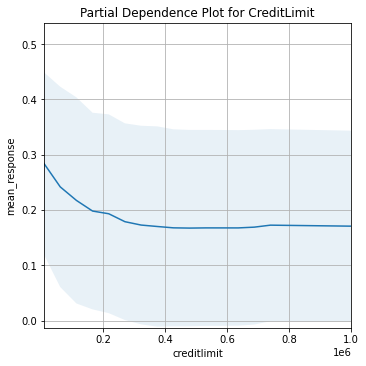

In [17]:
# get partial importance plot
model.partial_plot(train, cols = ["CreditLimit"], figsize = (5, 5))

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20220903_10054


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28753752150106504: 


,0,1,Error,Rate
0,3939.0,701.0,0.1511,(701.0/4640.0)
1,558.0,783.0,0.4161,(558.0/1341.0)
Total,4497.0,1484.0,0.2105,(1259.0/5981.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

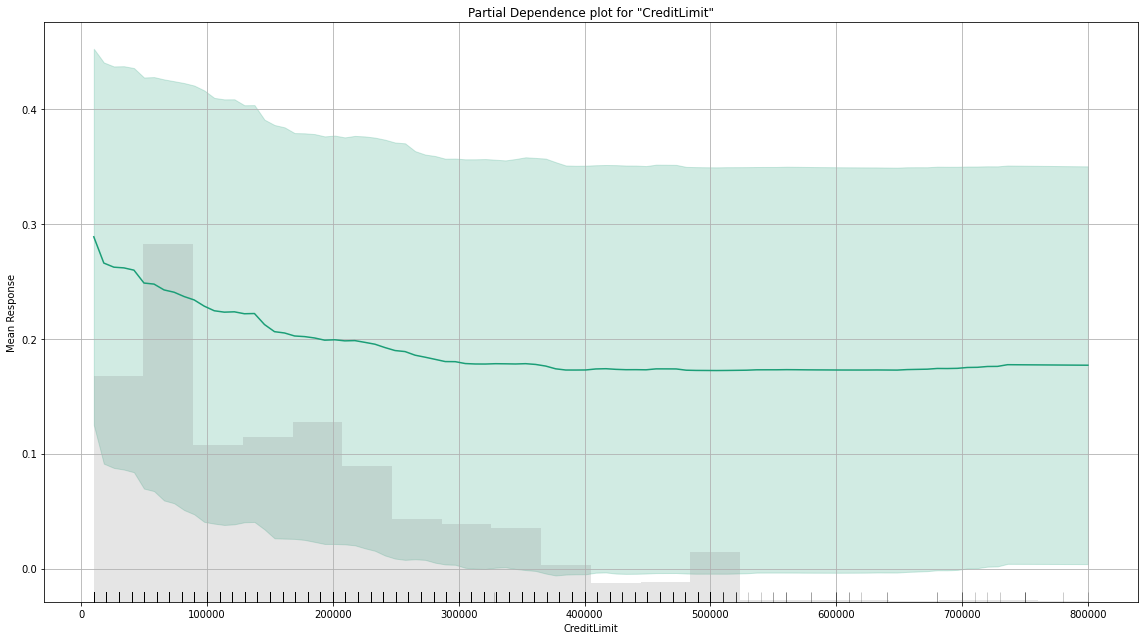

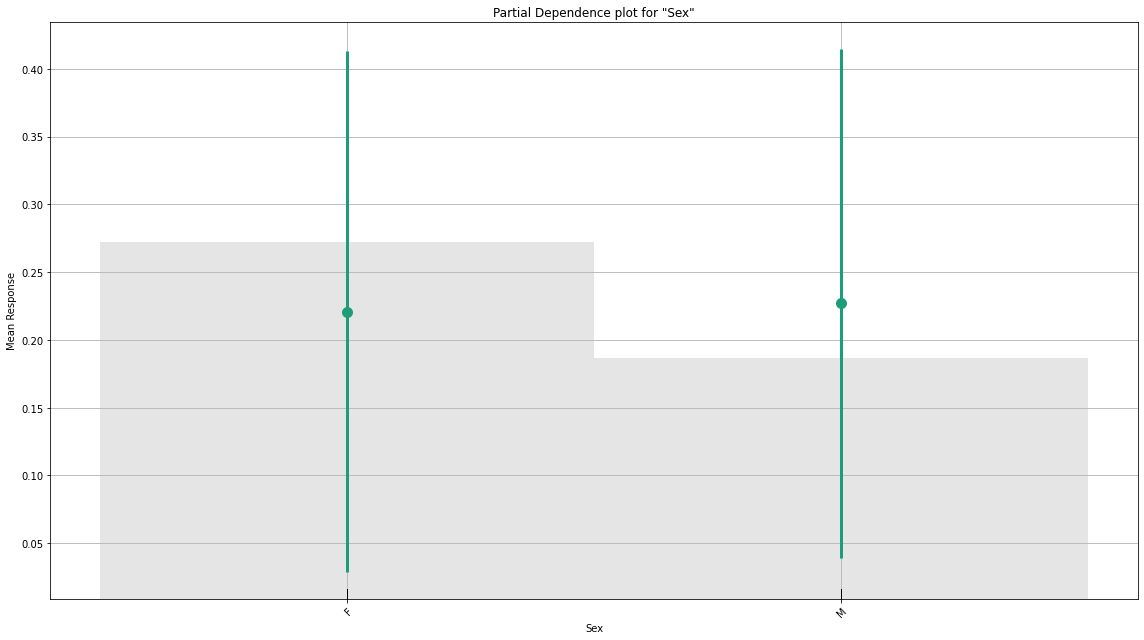

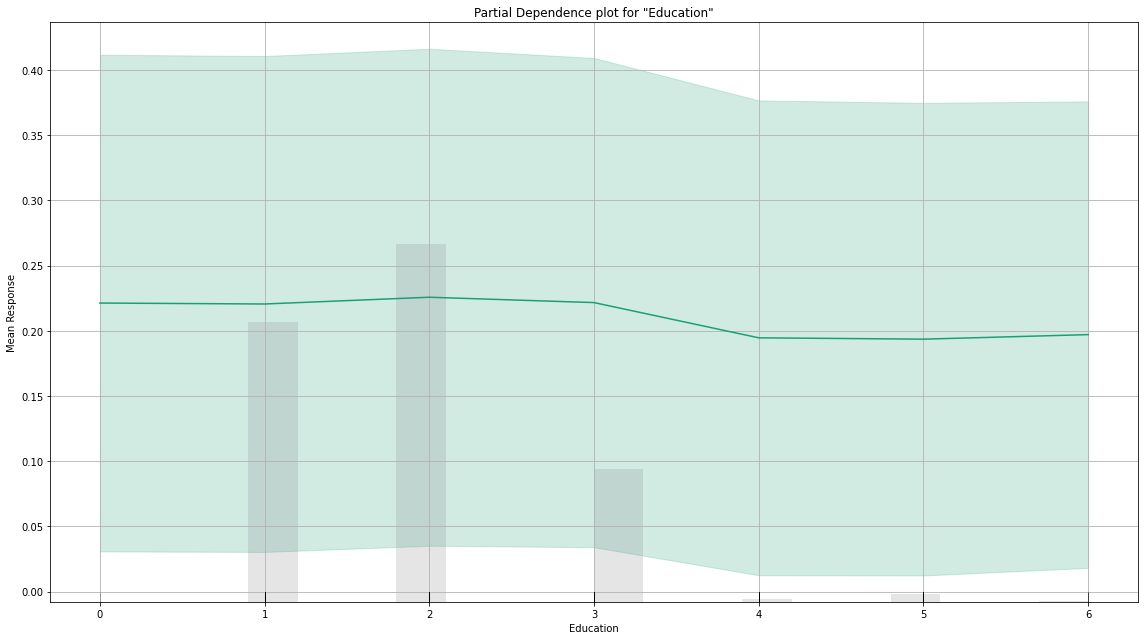

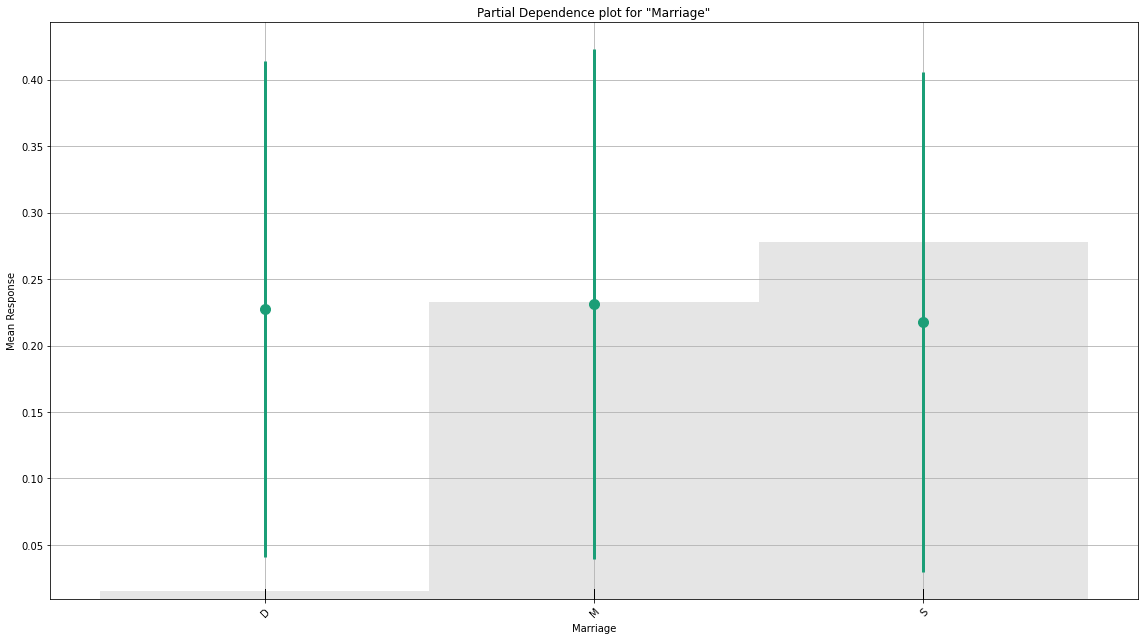

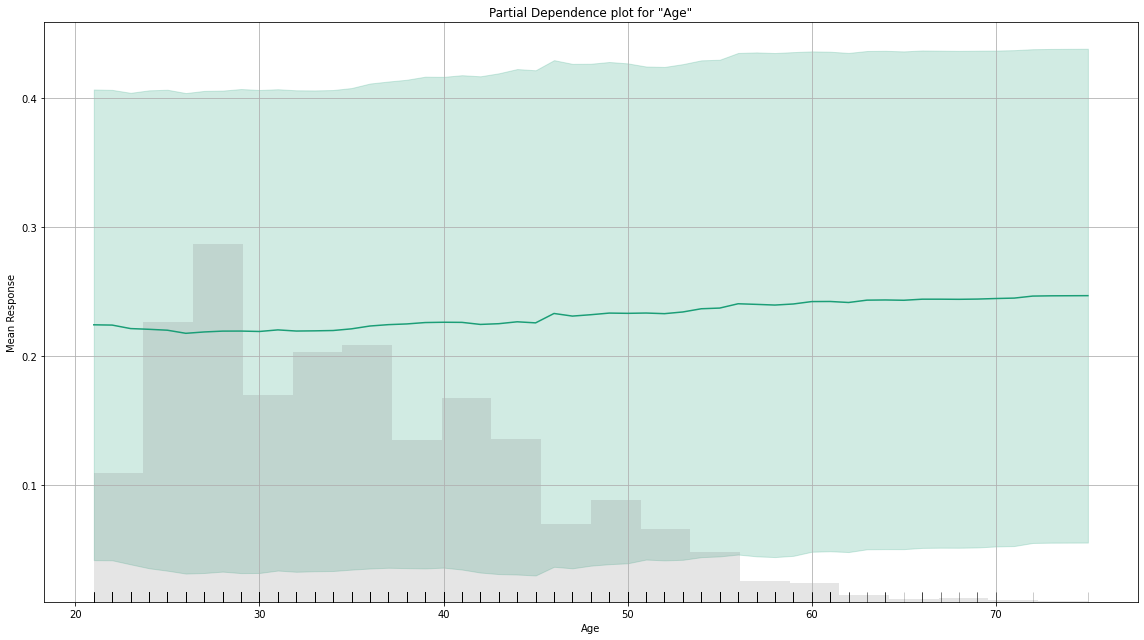

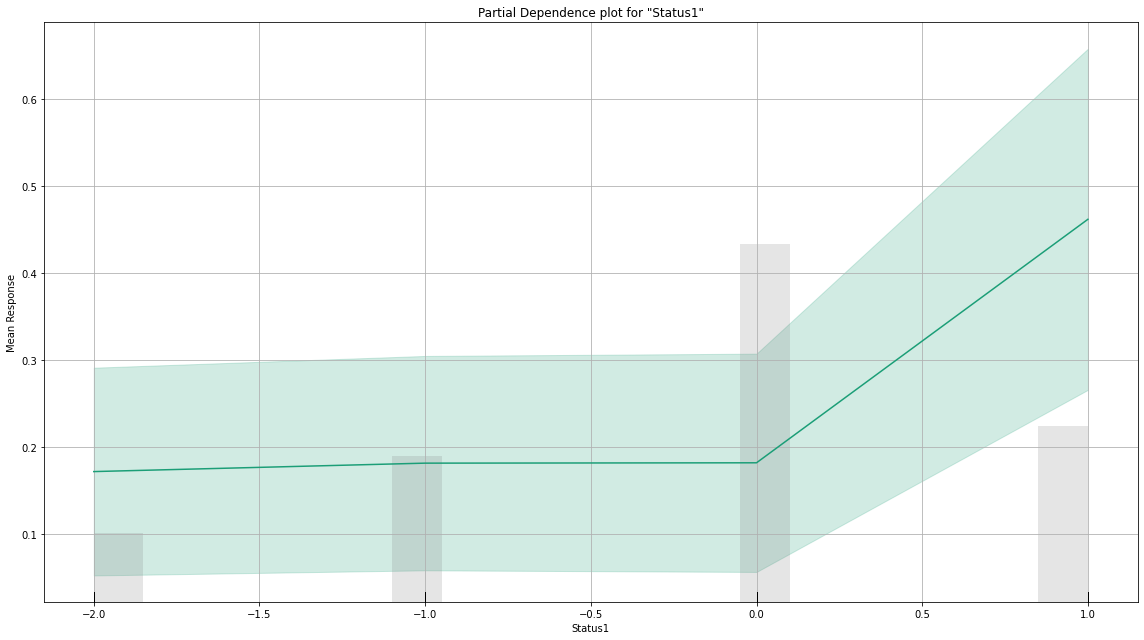

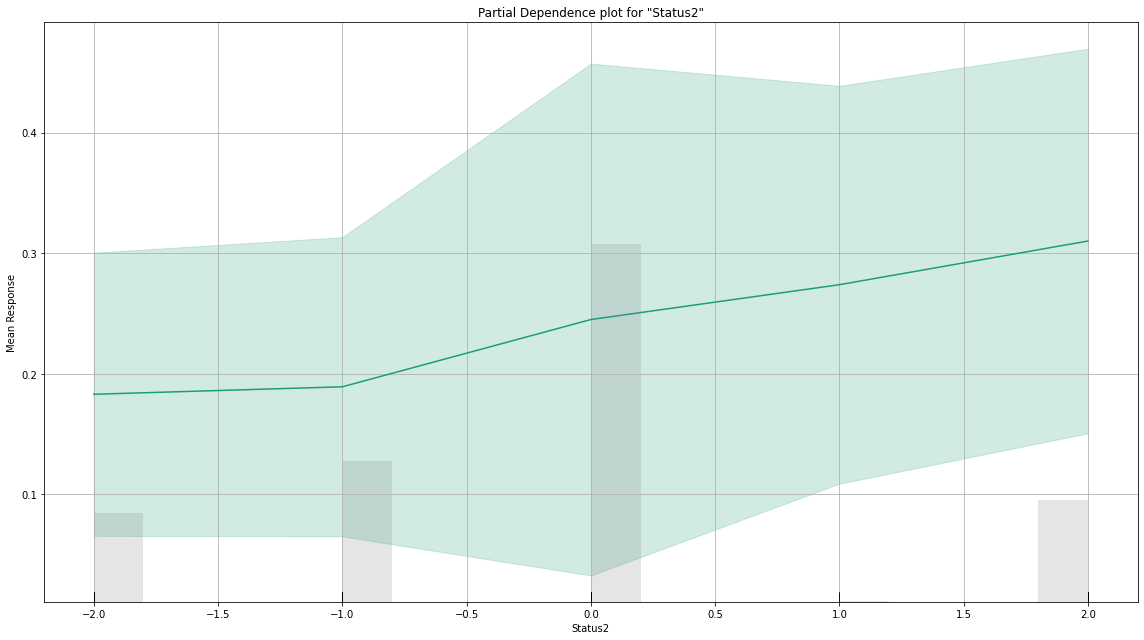

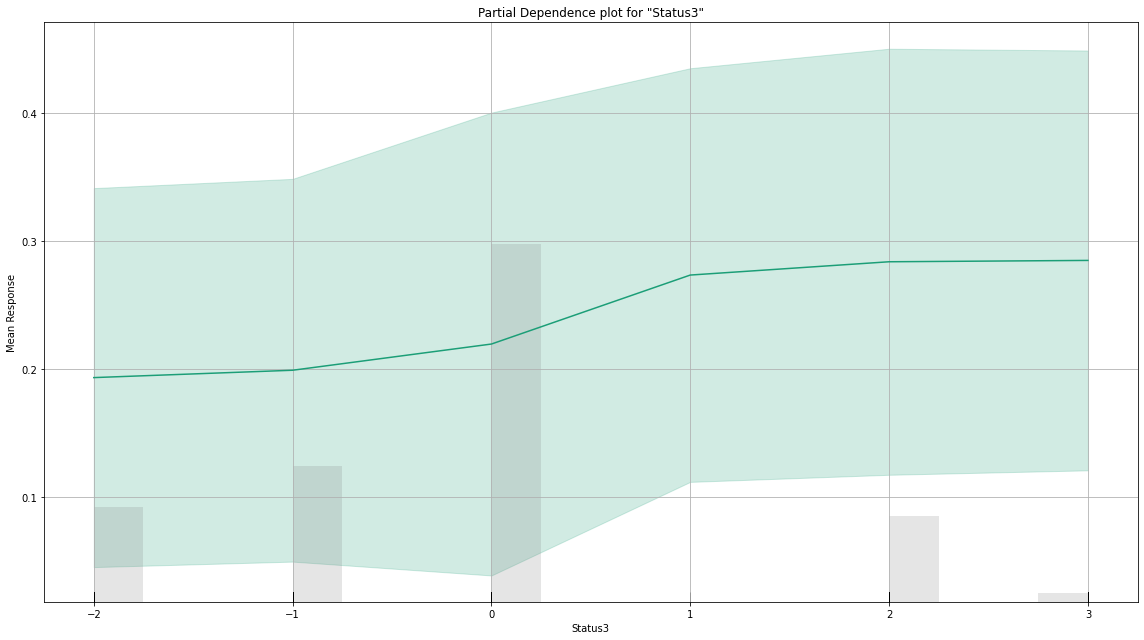

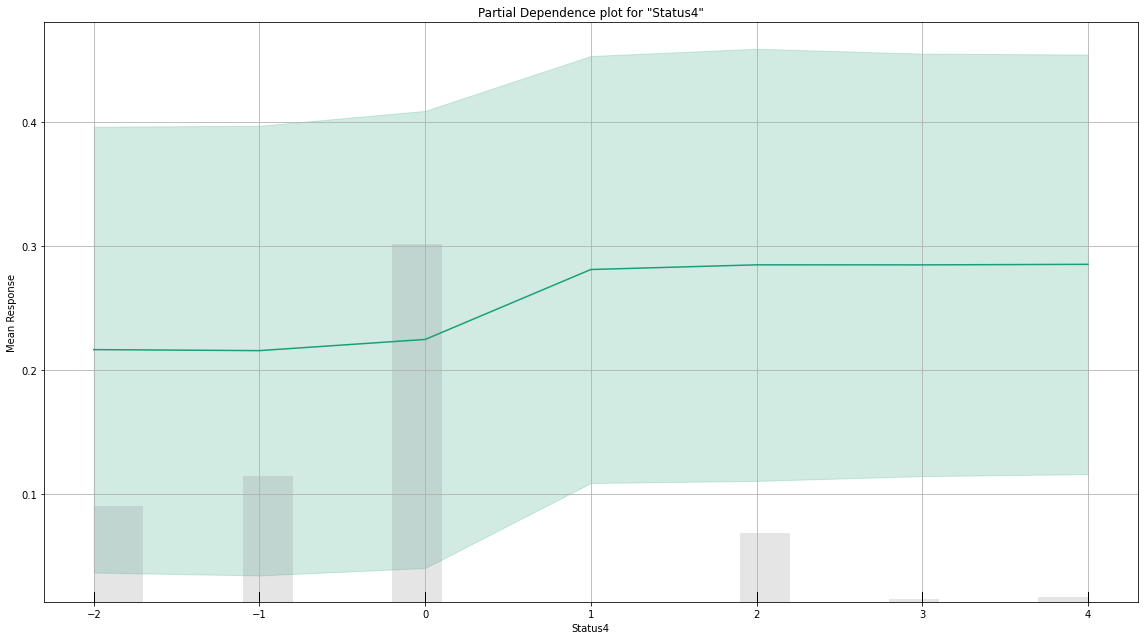

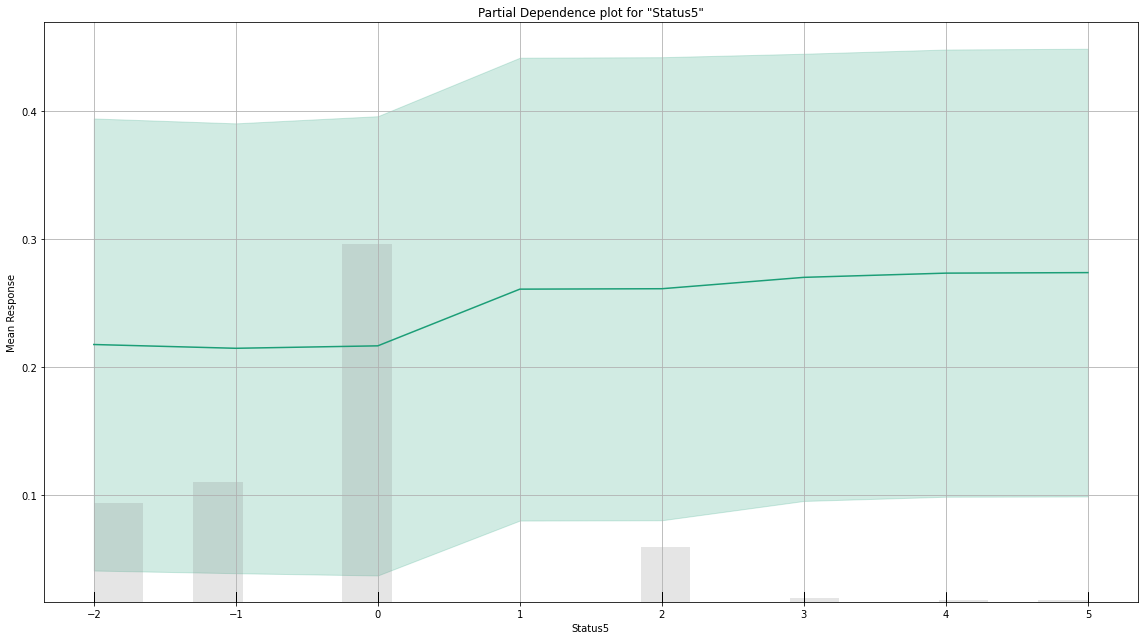

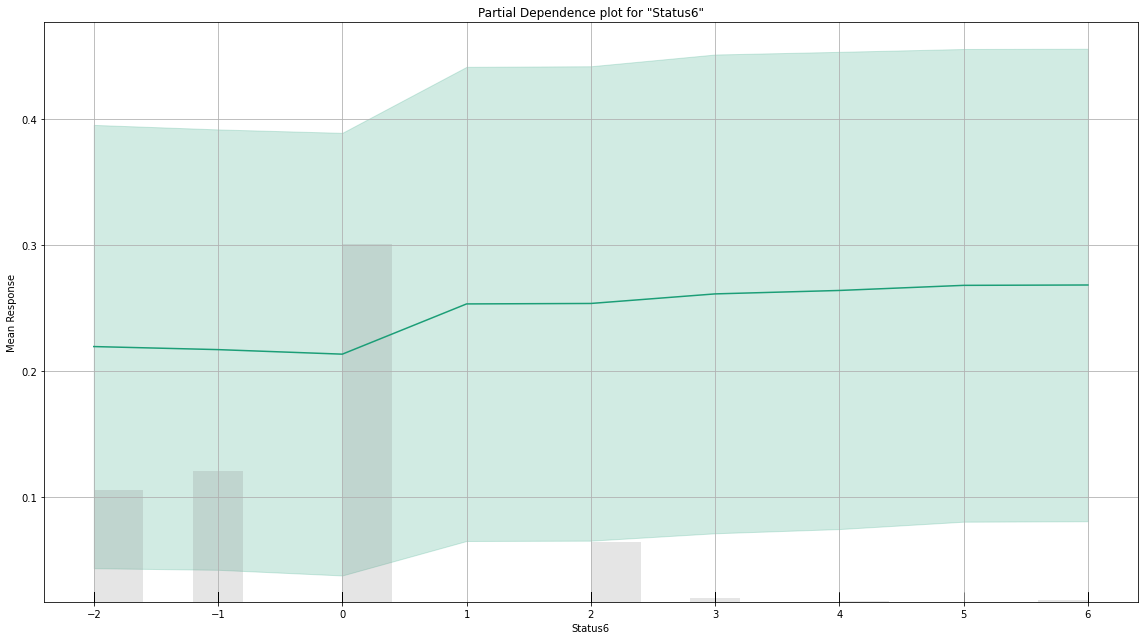

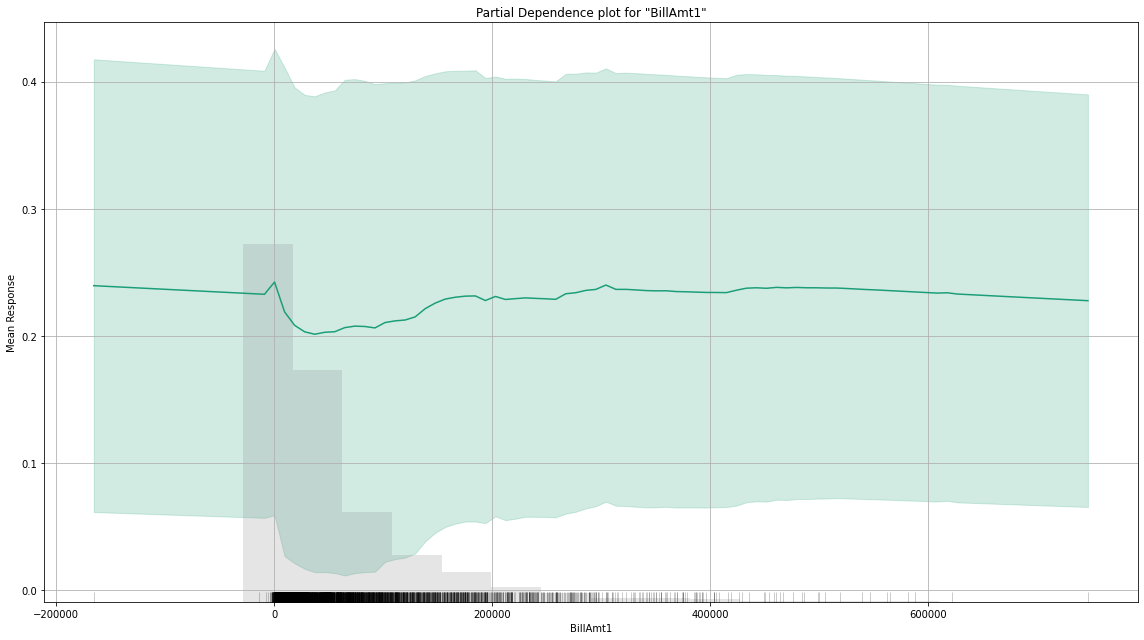

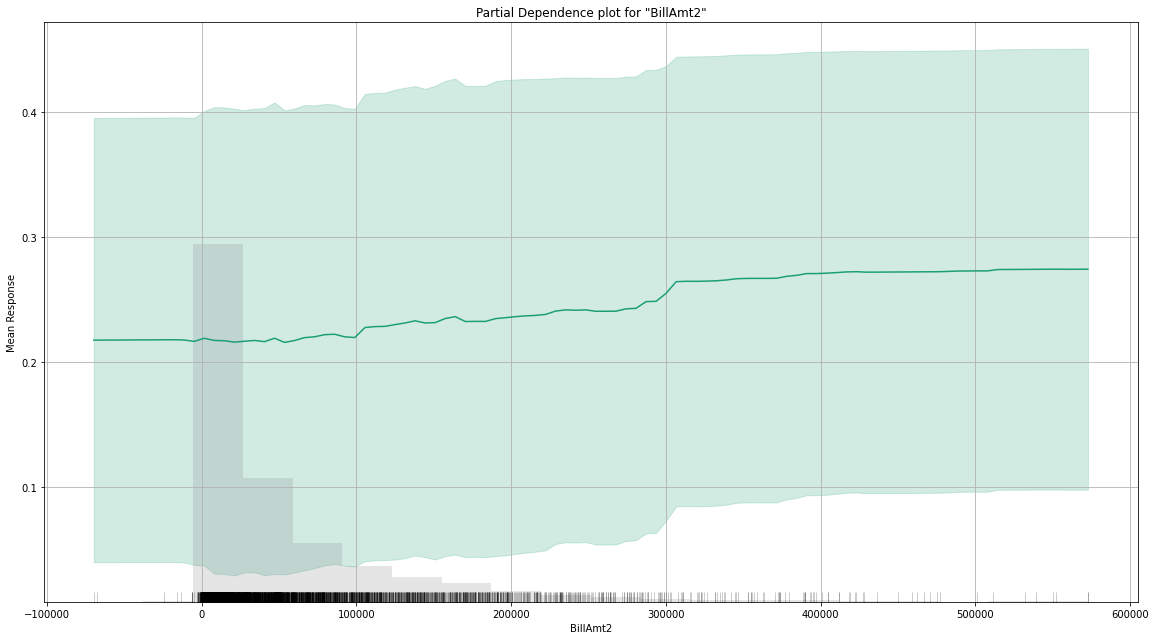

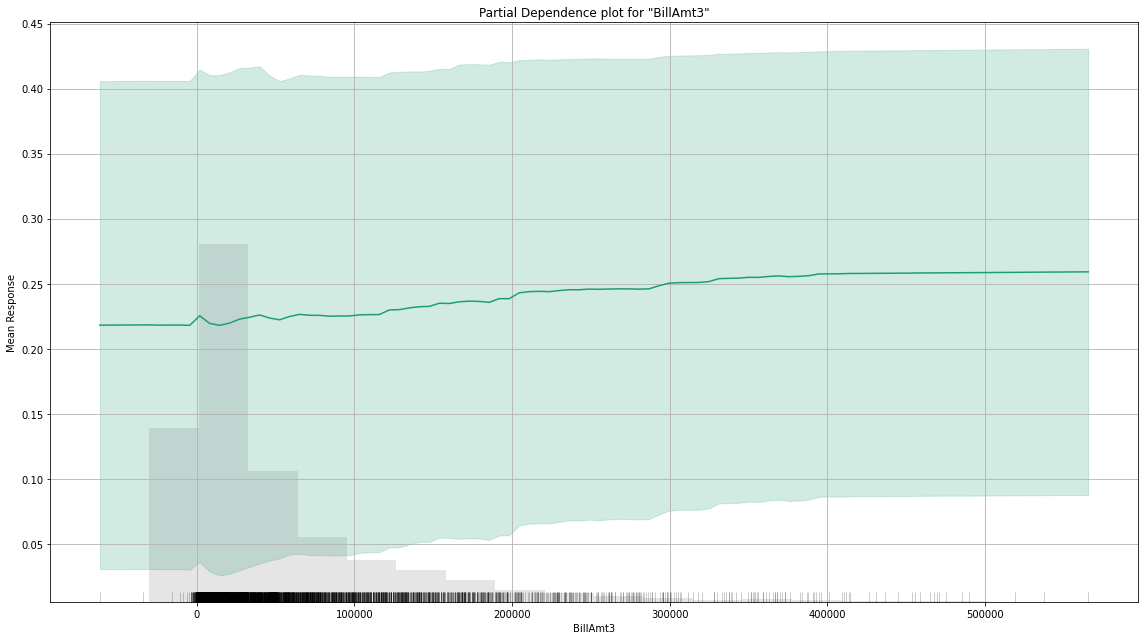

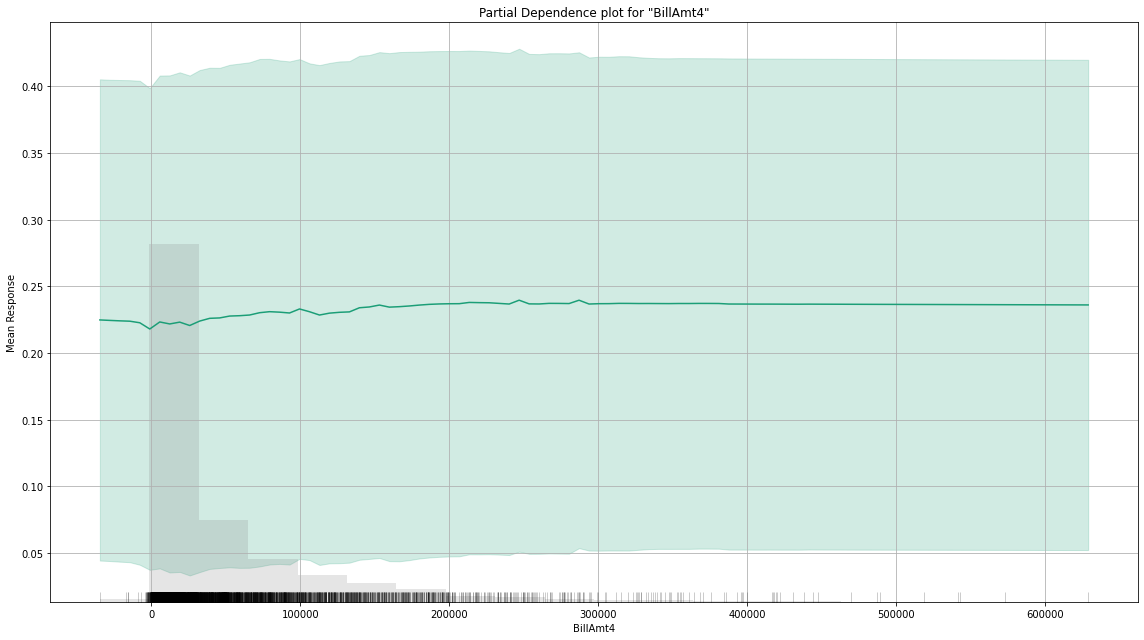

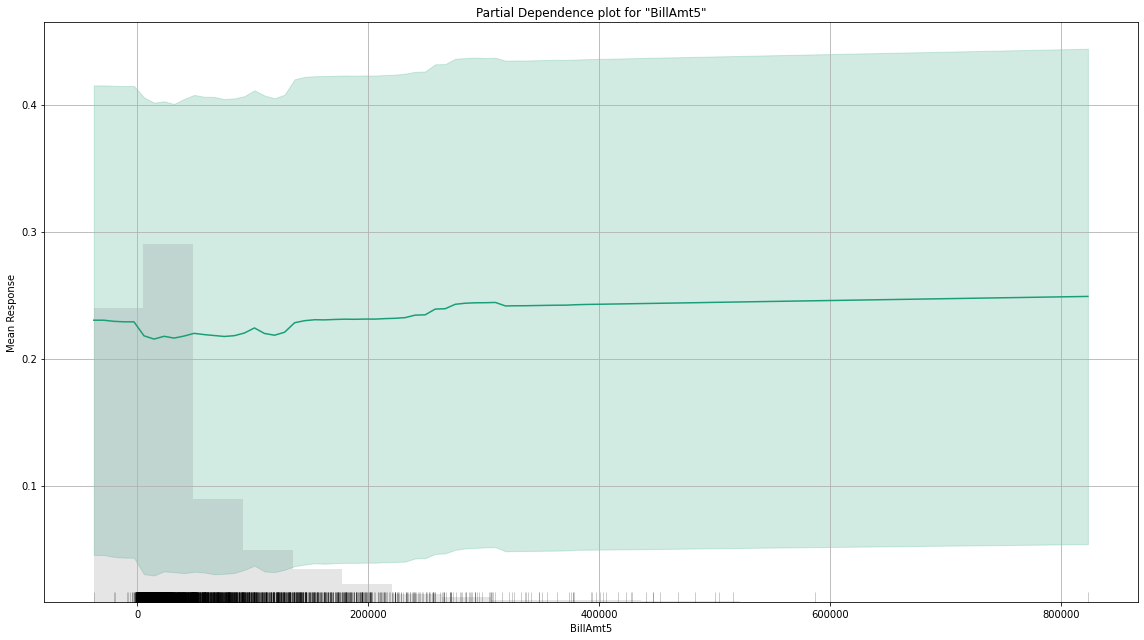

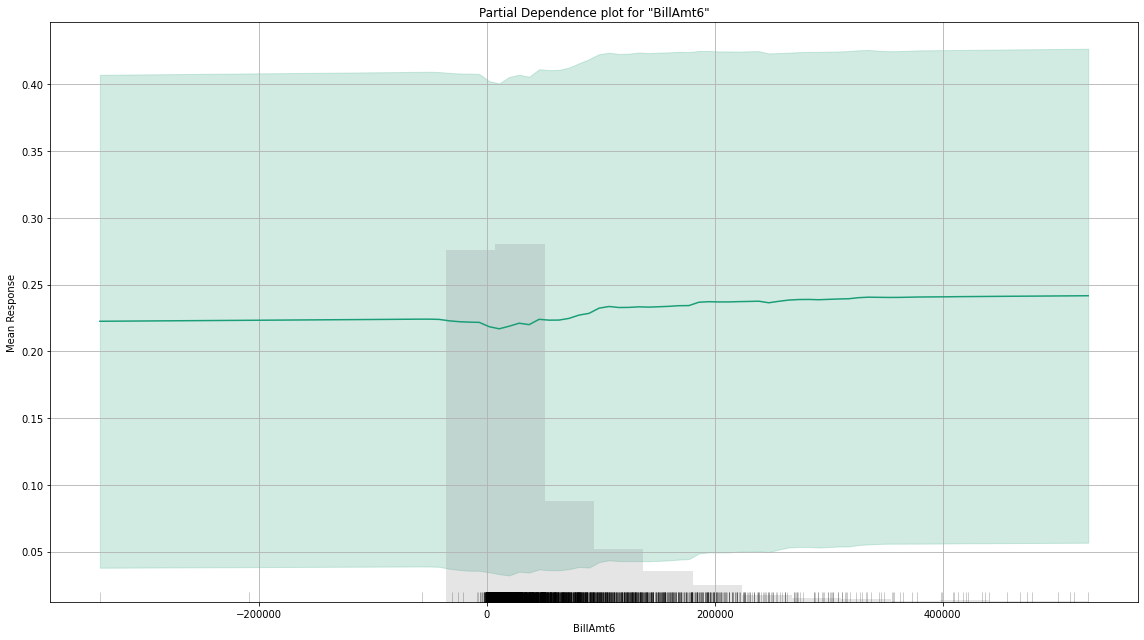

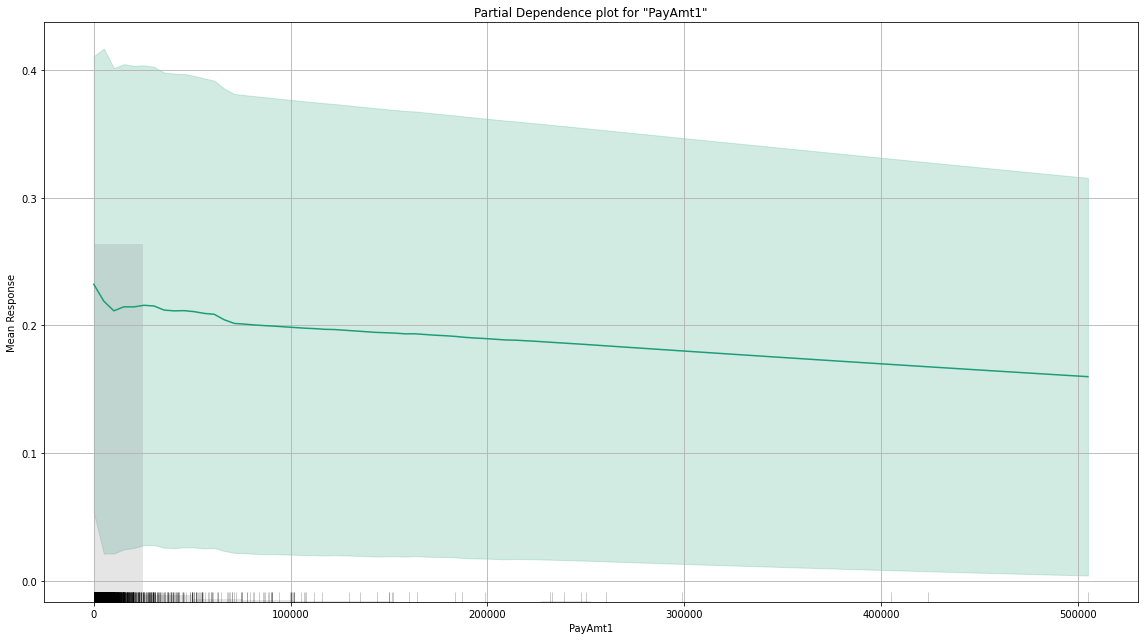

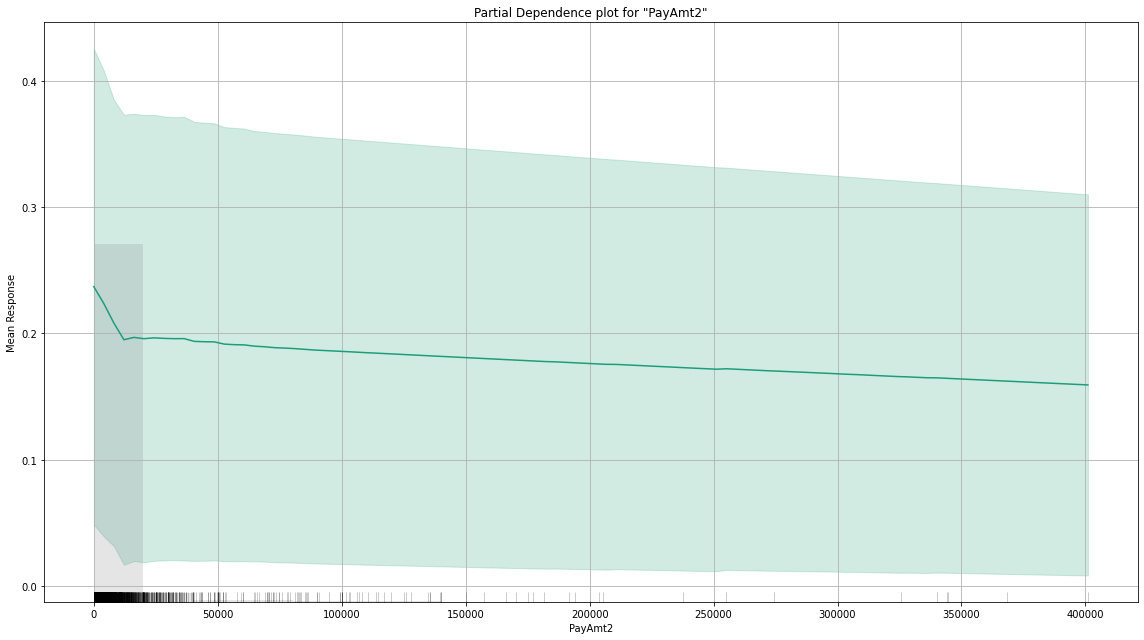

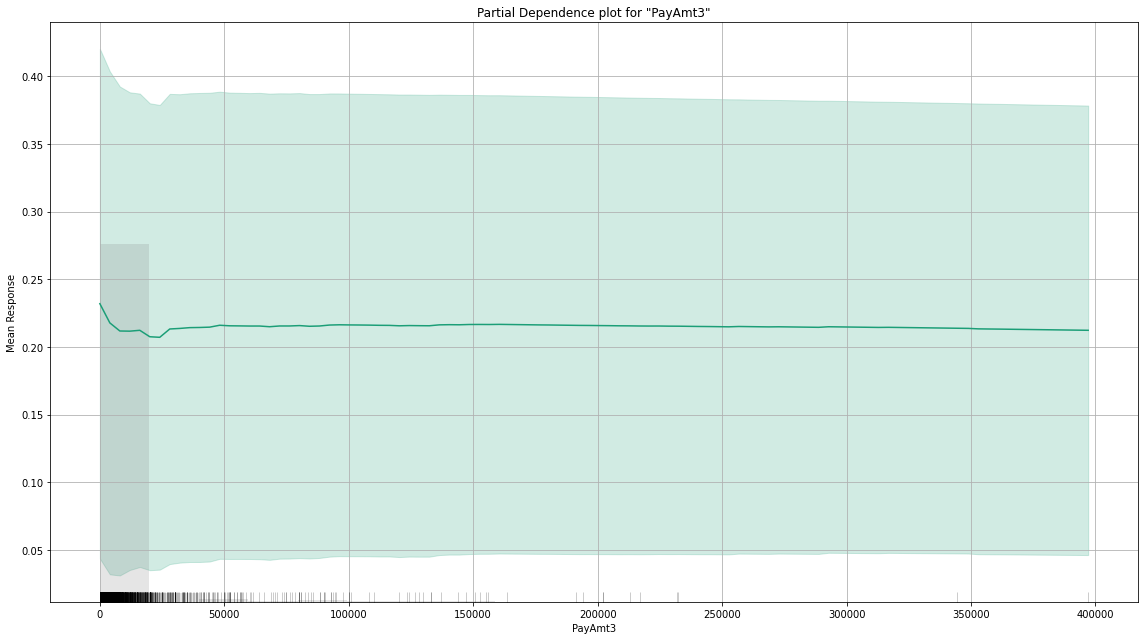

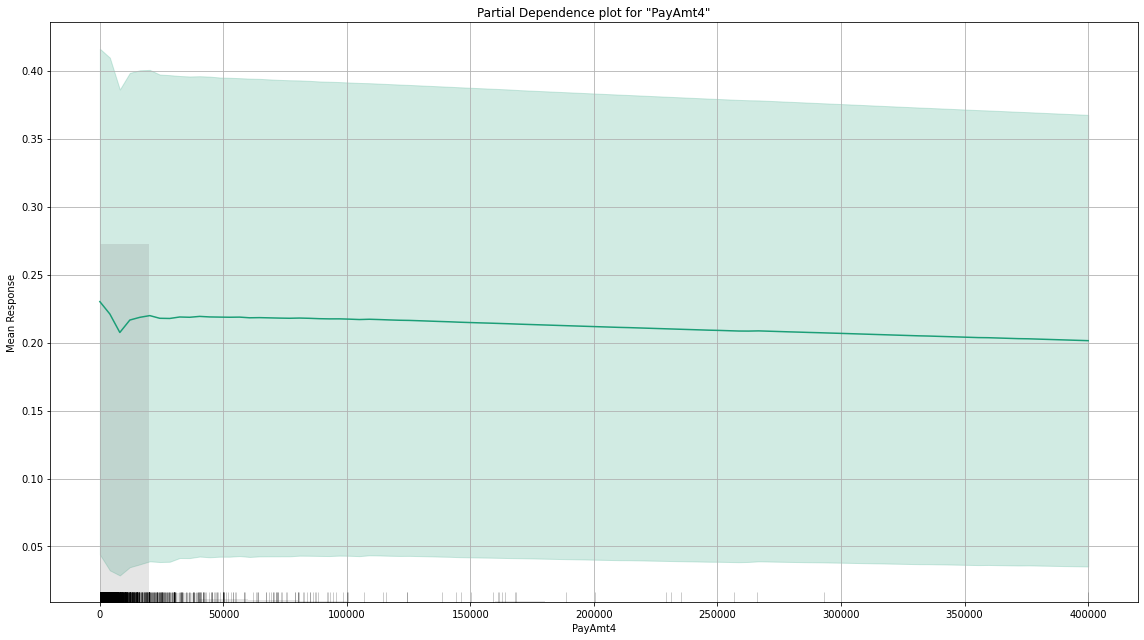

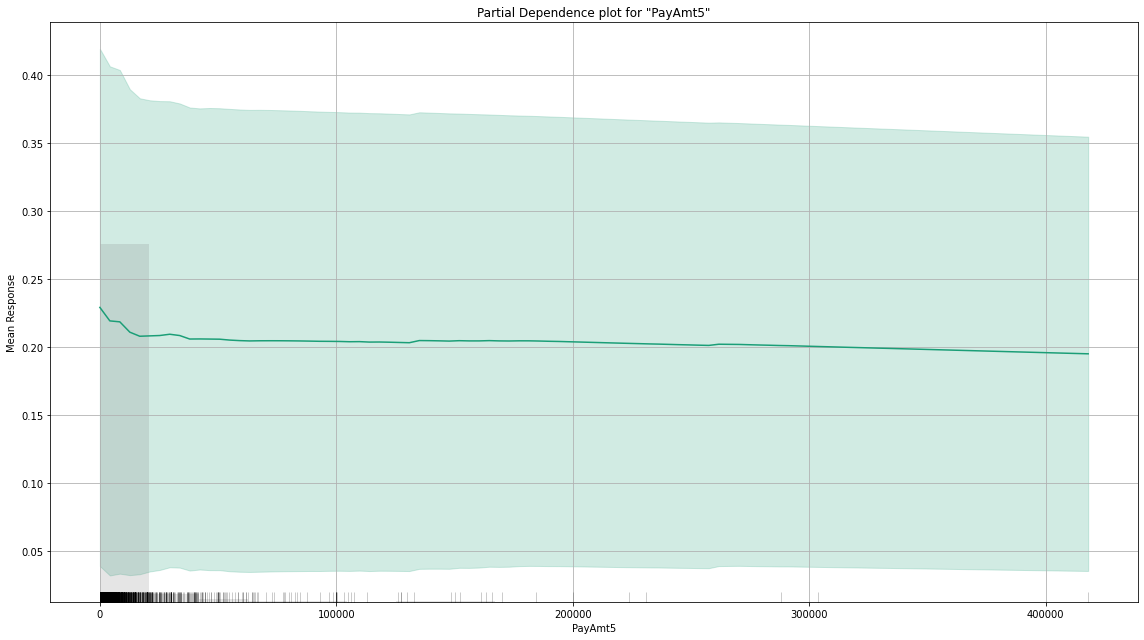

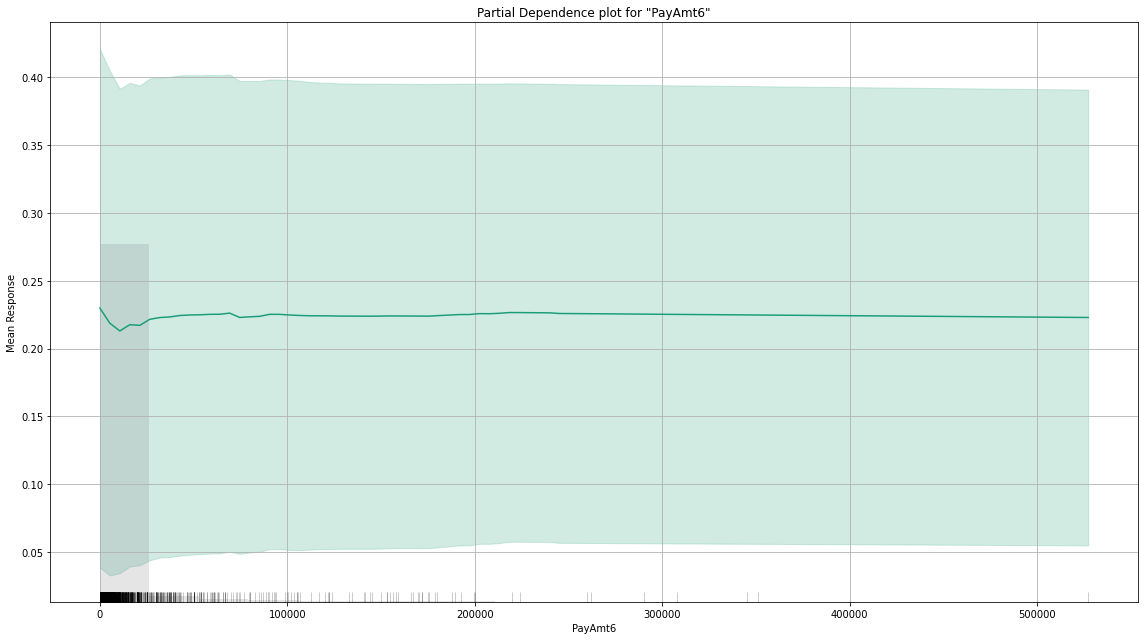

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20220903_10054


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28753752150106504: 


,0,1,Error,Rate
0,3939.0,701.0,0.1511,(701.0/4640.0)
1,558.0,783.0,0.4161,(558.0/1341.0)
Total,4497.0,1484.0,0.2105,(1259.0/5981.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [19]:
model.explain(frame=test)